In [ ]:
'''
This code will focus on the titanic data analysis, for the surviver prediction using the 
logistic regression model
'''

In [145]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, confusion_matrix , recall_score , precision_score , accuracy_score ,classification_report
import warnings
from sklearn.compose import ColumnTransformer
import seaborn as sns
warnings.filterwarnings('ignore')

In [134]:
titanicDataFrame = pd.read_csv('/Users/uday_kumar_swamy/Library/CloudStorage/OneDrive-Personal/datascience_videos/machinelearningpractice/machinelearning/dataset/titanic/train.csv')

In [135]:
#check the head of the data
titanicDataFrame.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [136]:
#check shape of the data
titanicDataFrame.shape

(891, 12)

In [137]:
#information about the dataframe
titanicDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [138]:
#now lets see the null's in the dataframe
titanicDataFrame.isna().sum()

#so we have the age and Cabin as null values
#we need to fill that values with and mode
#as the cabin has more prapostion of missing values, so we are heading to delete that column
#as it is imbalenced
titanicDataFrame = titanicDataFrame.drop(columns=['Cabin'],axis=1)
'''
we want to drop the columns which are irr-relevant to
our analysis, that is ID's , Cabin, Ticket , Name
'''
titanicDataFrame = titanicDataFrame.drop(columns=['PassengerId','Name','Ticket'])


In [139]:
'''
now lets fill the age, by calculatin the each Pclass age average
'''
titanicDataFrame.groupby(['Pclass']).mean()
titanicDataFrame

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [140]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age
    
titanicDataFrame['Age'] = titanicDataFrame[['Age','Pclass']].apply(age_approx , axis= 1)

In [141]:
'''
as there are 2 Embarked missing values we can either delete them or we can replace them with
most frequent, as 2 rows deletion does not impact our over all prediction we will drop the 
missing values
'''
titanicDataFrame.dropna(inplace=True)
titanicDataFrame.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [142]:
titanicDataFrame.Age.value_counts



<bound method IndexOpsMixin.value_counts of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64>

In [143]:
#now lets do the dummy encoding for the object columns that is age and embarked

titanicDataFrameFinal = pd.get_dummies(titanicDataFrame,columns=['Sex','Embarked'],drop_first=True)



In [144]:
titanicDataFrameFinal.head(20)


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,25.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


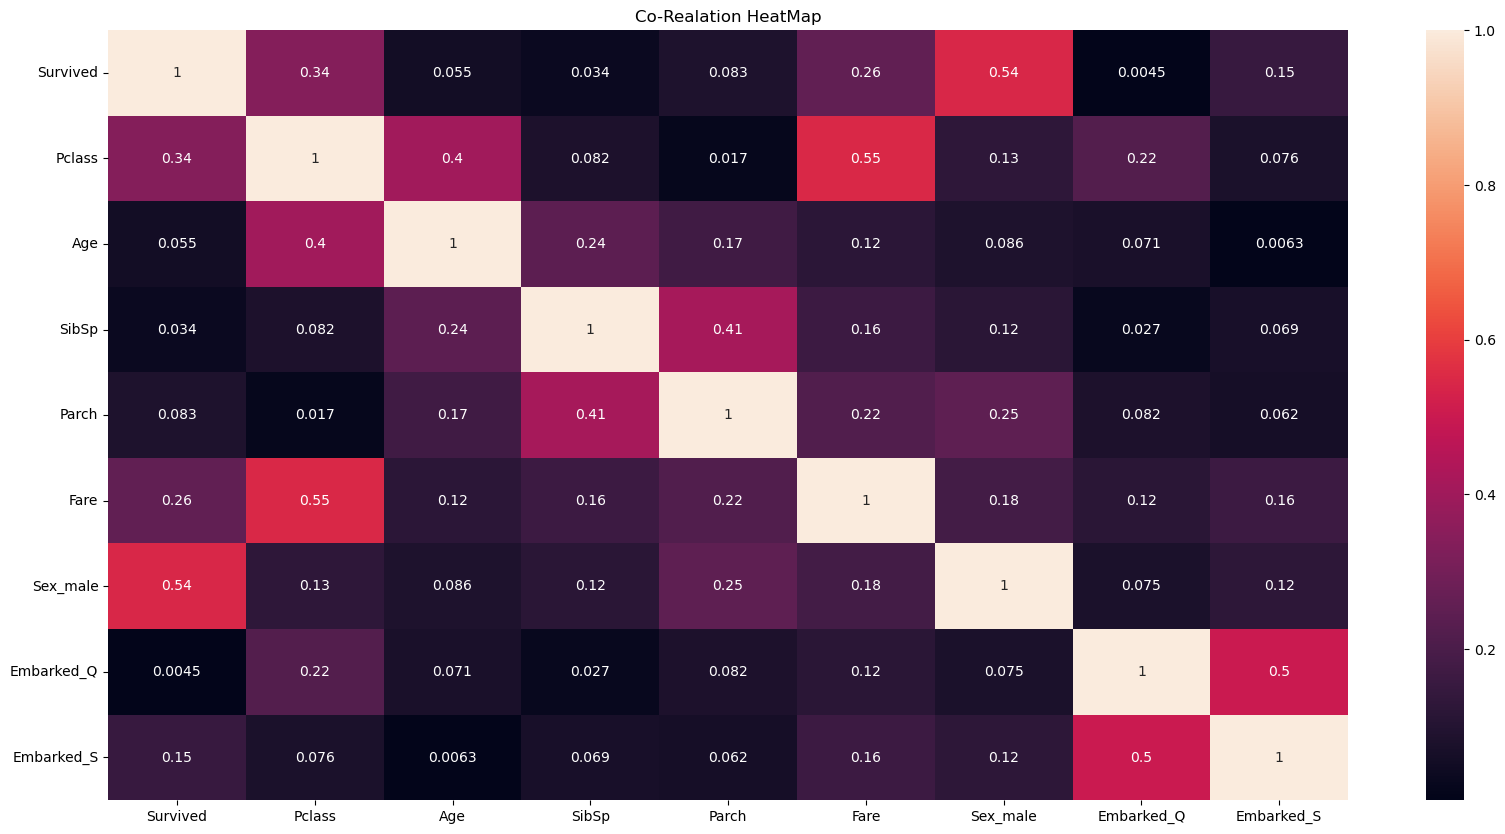

In [149]:
'''
now lets do some EDA, lets see the co-relation between the independent features,
as we can see that more cells are in dark blue only there is no strong co-relation 
between the independent features
'''
plt.figure(figsize=(20,10))
sns.heatmap(titanicDataFrameFinal.corr().abs(),annot=True)
plt.title('Co-Realation HeatMap')
plt.show()

In [151]:
#now lets split the data
X = titanicDataFrameFinal.drop(columns=['Survived'], axis=1)
Y = titanicDataFrame['Survived']
X_train ,X_test, y_train, y_test = train_test_split(X,Y,train_size=0.7,random_state=2)

In [152]:
#now lets train the model
logestic_reg = LogisticRegression()
logestic_reg.fit(X_train,y_train)
y_pred_test = logestic_reg.predict(X_test)


In [153]:
from sklearn.metrics import plot_confusion_matrix

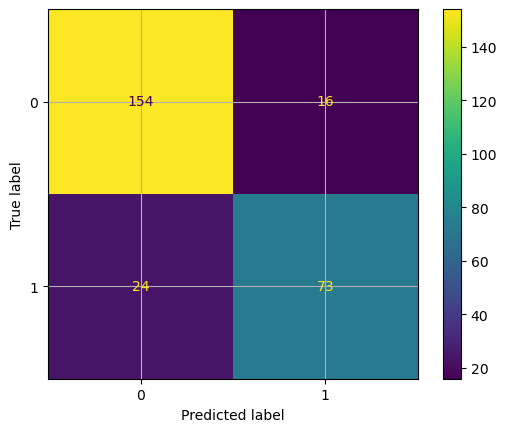

In [154]:
plot_confusion_matrix(logestic_reg,X_test,y_test)
plt.grid()

In [155]:
#now lets check the accuracy_score
accuracy_score(y_test,y_pred)

0.850187265917603

In [156]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       170
           1       0.82      0.75      0.78        97

    accuracy                           0.85       267
   macro avg       0.84      0.83      0.84       267
weighted avg       0.85      0.85      0.85       267



In [157]:
logestic_reg.predict_proba(X_test)
'''
this will give the 2 , values if the value is > 0.5 then that will be classifed as 1 --> true else 0 
'''

array([[0.8394813 , 0.1605187 ],
       [0.82856666, 0.17143334],
       [0.25140761, 0.74859239],
       [0.77209633, 0.22790367],
       [0.93989514, 0.06010486],
       [0.67064948, 0.32935052],
       [0.88924623, 0.11075377],
       [0.91493215, 0.08506785],
       [0.7872068 , 0.2127932 ],
       [0.75752109, 0.24247891],
       [0.75213301, 0.24786699],
       [0.70695767, 0.29304233],
       [0.43786512, 0.56213488],
       [0.82836435, 0.17163565],
       [0.8525814 , 0.1474186 ],
       [0.56973085, 0.43026915],
       [0.19903933, 0.80096067],
       [0.94572453, 0.05427547],
       [0.27527587, 0.72472413],
       [0.86867959, 0.13132041],
       [0.26506901, 0.73493099],
       [0.93419558, 0.06580442],
       [0.11955641, 0.88044359],
       [0.91181296, 0.08818704],
       [0.59955355, 0.40044645],
       [0.82863274, 0.17136726],
       [0.8394813 , 0.1605187 ],
       [0.79372308, 0.20627692],
       [0.05895158, 0.94104842],
       [0.06592474, 0.93407526],
       [0.

In [158]:
'''
now lets save our model
'''
import joblib

# Save the model to a file
joblib.dump(logestic_reg, '/Users/uday_kumar_swamy/Library/CloudStorage/OneDrive-Personal/datascience_videos/machinelearningpractice/machinelearning/models/titanicmodel.pkl')

['/Users/uday_kumar_swamy/Library/CloudStorage/OneDrive-Personal/datascience_videos/machinelearningpractice/machinelearning/models/titanicmodel.pkl']